In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/preprocessed_train.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523021 entries, 0 to 523020
Data columns (total 54 columns):
StoreID                        523021 non-null int64
Date                           523021 non-null object
IsHoliday                      523021 non-null int64
IsOpen                         523021 non-null int64
HasPromotions                  523021 non-null int64
StoreType                      523021 non-null object
AssortmentType                 523021 non-null object
NearestCompetitor              523021 non-null int64
Region                         523021 non-null int64
NumberOfCustomers              523021 non-null int64
NumberOfSales                  523021 non-null int64
Region_AreaKM2                 523021 non-null int64
Region_GDP                     523021 non-null int64
Region_PopulationK             523021 non-null int64
CloudCover                     523021 non-null float64
Events                         523021 non-null object
Max_Dew_PointC                 5230

In [4]:
    m = df.isnull().any()
    print("========= COLUMNS WITH NULL VALUES =================")
    print(m[m])
    print("========= COLUMNS WITH INFINITE VALUES =================")
    m = np.isfinite(df.select_dtypes(include=['float64'])).any()
    print(m[m])

========= COLUMNS WITH NULL VALUES =================
Series([], dtype: bool)
========= COLUMNS WITH INFINITE VALUES =================
CloudCover           True
Max_VisibilityKm     True
Mean_VisibilityKm    True
Min_VisibilitykM     True
Precipitationmm      True
MeanStoreSales       True
MeanRegionSales      True
dtype: bool


Normalization

In [5]:
df = df.reset_index()

In [6]:
import sklearn.preprocessing
features = ['Max_Dew_PointC','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC',
            'Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa',
            'Mean_TemperatureC','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity',
            'Min_Sea_Level_PressurehPa','Min_TemperatureC','Precipitationmm','Mean_VisibilityKm']
# Separating out the features
x = df.loc[:, features].values
x
# Separating out the target
y = df.loc[:,['NumberOfSales']].values
# Standardizing the features
x = sklearn.preprocessing.normalize(x,axis=0)
dff=pd.DataFrame(x)
dff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000133,0.001474,0.001402,0.000167,0.001216,-0.000161,0.001492,0.001403,0.000111,0.001692,-0.000396,0.001764,0.001406,0.000156,0.000000,0.000000e+00
1,0.000000,0.001282,0.001399,0.000417,0.000927,-0.000161,0.001329,0.001399,0.000333,0.001057,-0.000396,0.001461,0.001400,0.000156,0.000000,4.579126e-09
2,0.000000,0.001194,0.001393,0.000333,0.001332,-0.000161,0.001292,0.001395,0.000333,0.001057,-0.000593,0.001386,0.001398,0.000312,0.000000,9.158251e-09
3,-0.000399,0.001179,0.001395,0.000667,0.001100,-0.000646,0.001019,0.001395,0.000333,0.001057,-0.001187,0.000630,0.001396,-0.000156,0.000000,1.373738e-08
4,0.000000,0.001370,0.001392,0.000583,0.000927,-0.000484,0.001365,0.001394,0.000111,0.000529,-0.001187,0.001209,0.001396,-0.000781,0.000000,1.831650e-08
5,-0.000266,0.001370,0.001391,0.000917,0.001390,-0.000484,0.001183,0.001390,0.000444,0.001163,-0.000791,0.000655,0.001388,-0.000312,0.000000,2.289563e-08
6,-0.000133,0.001282,0.001381,0.001084,0.000811,-0.000323,0.001092,0.001379,0.000666,0.000846,-0.000791,0.000605,0.001377,-0.000312,0.000000,2.747475e-08
7,0.000266,0.001370,0.001370,0.001250,0.000927,-0.000161,0.001074,0.001368,0.000777,0.001057,-0.000396,0.000630,0.001366,-0.000156,0.000000,3.205388e-08
8,0.001063,0.001282,0.001361,0.001334,0.000753,0.000323,0.001001,0.001362,0.001221,0.000634,0.000000,0.000706,0.001365,0.000937,0.000000,3.663301e-08
9,0.001063,0.001370,0.001361,0.001417,0.000811,0.001130,0.001292,0.001362,0.001332,0.001163,0.000989,0.000932,0.001363,0.001094,0.000256,4.121213e-08


Performing normalization

In [7]:
from sklearn.decomposition import PCA

n_components=9
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

Computing variance

In [8]:
pca.explained_variance_ratio_

array([0.58390986, 0.21348911, 0.06984461, 0.05860608, 0.04957235,
       0.01031529, 0.00531221, 0.00494227, 0.0020153 ])

These values represent the percentage of information each principal components provide

In [9]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([58.39, 79.74, 86.72, 92.58, 97.54, 98.57, 99.1 , 99.59, 99.79])

This array represents the total percentage of information available considering from 1 to n principal components

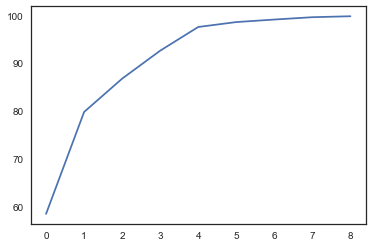

In [10]:
plt.plot(var1)

In [11]:
print(pd.DataFrame(pca.components_,columns=dff.columns,index = p_list))

          0         1         2         3         4         5         6   \
p1 -0.356564  0.002235  0.000394 -0.283058  0.015504 -0.429521  0.028173   
p2 -0.023303  0.013086 -0.001246 -0.094967  0.080036 -0.027986  0.050240   
p3 -0.010661 -0.058042 -0.002731  0.030179  0.592914 -0.043513 -0.094330   
p4 -0.001059 -0.009180 -0.000636 -0.001532  0.104659 -0.004550 -0.013498   
p5 -0.057706 -0.082446  0.001540  0.379969 -0.065743 -0.183180 -0.303077   
p6  0.401675  0.181237  0.000485  0.244288  0.500160  0.249790  0.143351   
p7 -0.257030 -0.058521 -0.002323 -0.199724  0.608709 -0.166316 -0.014659   
p8  0.467042 -0.009035 -0.000271 -0.134433 -0.055648  0.148133  0.098462   
p9 -0.223234 -0.240480  0.001157  0.548354  0.041485 -0.125807 -0.143994   

          7         8         9         10        11        12        13  \
p1  0.000061 -0.345002  0.055758 -0.520050  0.071531 -0.000231 -0.438062   
p2 -0.001715 -0.082987  0.081763 -0.029715  0.095211 -0.001936 -0.055385   
p3 -0.00355

This values represent how the 18 attributes considered influence the weights
of the principal components vector

In [12]:
for x in features: 
    df = df.drop(x, 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523021 entries, 0 to 523020
Data columns (total 39 columns):
index                          523021 non-null int64
StoreID                        523021 non-null int64
Date                           523021 non-null object
IsHoliday                      523021 non-null int64
IsOpen                         523021 non-null int64
HasPromotions                  523021 non-null int64
StoreType                      523021 non-null object
AssortmentType                 523021 non-null object
NearestCompetitor              523021 non-null int64
Region                         523021 non-null int64
NumberOfCustomers              523021 non-null int64
NumberOfSales                  523021 non-null int64
Region_AreaKM2                 523021 non-null int64
Region_GDP                     523021 non-null int64
Region_PopulationK             523021 non-null int64
CloudCover                     523021 non-null float64
Events                         52302

In [13]:
finalDf=pd.concat([df,principalDf],axis=1)
finalDf

,index,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,...,MeanRegionSales,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002568,2.966701e-08,-0.000068,0.001210,-0.000466,-0.000427,-0.000009,4.028207e-05,-9.364982e-05
1,1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002401,-1.536007e-04,-0.000612,0.001106,0.000105,-0.000473,0.000161,-9.165577e-05,1.118809e-05
2,2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002459,-1.261786e-04,-0.000314,0.001157,0.000195,-0.000385,0.000475,7.717406e-05,-3.693092e-05
3,3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.003163,-1.958330e-04,-0.000320,0.001137,0.001247,-0.000392,0.000195,-2.042218e-04,-5.808454e-05
4,4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,...,3906.263994,0.003345,-1.307502e-04,-0.001070,0.001015,0.000700,0.000271,0.000053,-3.183227e-05,5.354048e-05
5,5,1000,07/03/2016,0,1,1,Hyper Market,General,326,7,...,3906.263994,0.002817,-1.945170e-04,-0.000148,0.001169,0.001057,-0.000008,0.000150,-4.880404e-04,1.243683e-06
6,6,1000,08/03/2016,0,1,1,Hyper Market,General,326,7,...,3906.263994,0.002544,-3.191525e-04,-0.000690,0.001071,0.001311,-0.000127,-0.000111,-3.881483e-04,9.560052e-05
7,7,1000,09/03/2016,0,1,1,Hyper Market,General,326,7,...,3906.263994,0.001988,-3.491513e-04,-0.000473,0.001111,0.001137,0.000003,-0.000243,-4.226460e-04,6.157791e-05
8,8,1000,10/03/2016,0,1,1,Hyper Market,General,326,7,...,3906.263994,0.000611,-5.444551e-04,-0.000724,0.001070,0.001103,-0.000249,0.000052,2.363692e-04,-5.691632e-05
9,9,1000,11/03/2016,0,1,1,Hyper Market,General,326,7,...,3906.263994,-0.000359,-2.867524e-04,-0.000456,0.001129,0.000326,-0.000262,-0.000246,-2.277708e-04,-1.020247e-04


In [17]:
finalDf.head()

,index,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,...,MeanRegionSales,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002568,2.966701e-08,-0.000068,0.001210,-0.000466,-0.000427,-0.000009,0.000040,-0.000094
1,1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002401,-1.536007e-04,-0.000612,0.001106,0.000105,-0.000473,0.000161,-0.000092,0.000011
2,2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002459,-1.261786e-04,-0.000314,0.001157,0.000195,-0.000385,0.000475,0.000077,-0.000037
3,3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.003163,-1.958330e-04,-0.000320,0.001137,0.001247,-0.000392,0.000195,-0.000204,-0.000058
4,4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,...,3906.263994,0.003345,-1.307502e-04,-0.001070,0.001015,0.000700,0.000271,0.000053,-0.000032,0.000054


In [18]:
finalDf.drop(['index'],inplace=True,axis=1)

In [19]:
finalDf.shape

(523021, 47)

In [20]:
finalDf.to_csv('./dataset/preprocessed_PCA_train.csv')